In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from pyecharts import options as opt

plt.rcParams['font.family'] = ['FangSong']
plt.rcParams['axes.unicode_minus'] = False

project_path = os.path.dirname(os.getcwd())
sys.path.append(project_path)

data_dir = r"{}\data\final_ex_data".format(project_path)

file_name = "origin_data.xlsx"
data_path = r"{}\{}".format(data_dir, file_name)

print(data_dir, "\t", data_path)

C:\Users\Administrator\matplotlib_vision\data\final_ex_data 	 C:\Users\Administrator\matplotlib_vision\data\final_ex_data\origin_data.xlsx


In [2]:
def read_file_path(file_name):
    return "{}\{}".format(data_dir, file_name)

In [3]:
# import pandas as pd

# data = pd.read_excel(data_path, "上市公司并购新闻", index_col=0)

# fillNaN_dict = {
#     "MAprice":0,
#     "State": "无",
#     "Currut": "未知",
#     "Sellernm": "无",
#     "Subnm":"无",
#     "Eqtrart": 0
# }
# for col_name, value in fillNaN_dict.items():
#     data[col_name] = data[col_name].fillna(value)

# def corporation_name(series):
#     sellernm = series["Sellernm"]
#     subnm = series["Subnm"]

#     if sellernm == "无":
#         return subnm
#     elif subnm == "无":
#         return sellernm
    
#     if len(sellernm) < len(subnm):
#         return sellernm
#     else:
#         return subnm
    
# data["corporation_name"] = data.apply(corporation_name, axis=1)


In [4]:
data = pd.read_csv(read_file_path("processed_data.csv"))
cond1 = data['MAprice'] != 0
cond2 = data['Ifrumor'] == "否"
cond3 = data['State'] == "无"
cond4 = data['Currut'] == "人民币"
real_merger_data = data.loc[cond1 & cond2 & cond3 & cond4]

In [5]:
real_merger_data = real_merger_data.copy(deep=True)

# 筛选出 真实 且 交易以亿元为单位的 公司合并 数据
real_merger_data.drop_duplicates(subset="Coname", inplace=True)

def maprice_filter(series):
    maprice = series["MAprice"]
    if str.__contains__(maprice, "亿元"):
        try:
            series["MAprice"] = float(maprice.removesuffix("亿元"))
            return series
        except:
            return

real_merger_data = real_merger_data.apply(maprice_filter, axis=1)


real_merger_data.dropna(axis=0, how="all", inplace=True)

real_merger_data["NewsDt"] = pd.to_datetime(real_merger_data["NewsDt"])

In [6]:
def getDataRangeFrom(start_year, end_year, data, column_name="NewsDt"):
    # column 提前转换为 datetime 类型
    cond1 = start_year <= data[column_name]
    cond2 = data[column_name] < end_year
    
    return data.loc[cond1 & cond2]



In [7]:
# 200x - 201z 1-12 data.csv
cond1 = data['MAprice'] != 0
cond2 = data['Ifrumor'] == "否"
cond3 = data['State'] == "无"
temp_merger_data = data.loc[cond1 & cond2 & cond3]

temp = pd.DataFrame()

range_data = getDataRangeFrom("2004", "2020", temp_merger_data )

range_data["known_price_count"] = range_data["MAprice"]

def _map(value):
    if value != 0:
        return 1

range_data["known_price_count"] = range_data["known_price_count"].map(_map)
range_data["NewsDt"] = pd.to_datetime(range_data["NewsDt"], format="%Y-%m-%d")

temp["year"] = range_data["NewsDt"].dt.year
temp["month"] = range_data["NewsDt"].dt.month
temp["MAprice"] = range_data["MAprice"]
temp["known_price_count"] = range_data["known_price_count"]

# temp["MAprice"] = temp["MAprice"].apply(lbd_func)

temp1 = temp.groupby(["year", "month"]).sum()
# print(temp1)
# print(temp.shape)
# print(temp1)
# print(data_dir)
# temp1.to_csv("{}\{}".format(data_dir, "known_price_count.csv"))
# temp1["MAprice"] = sp_data["MAprice"]

# real_merger_data.to_csv("{}\{}".format(data_dir, "real_merger_data.csv"))

<Figure size 1500x1500 with 0 Axes>

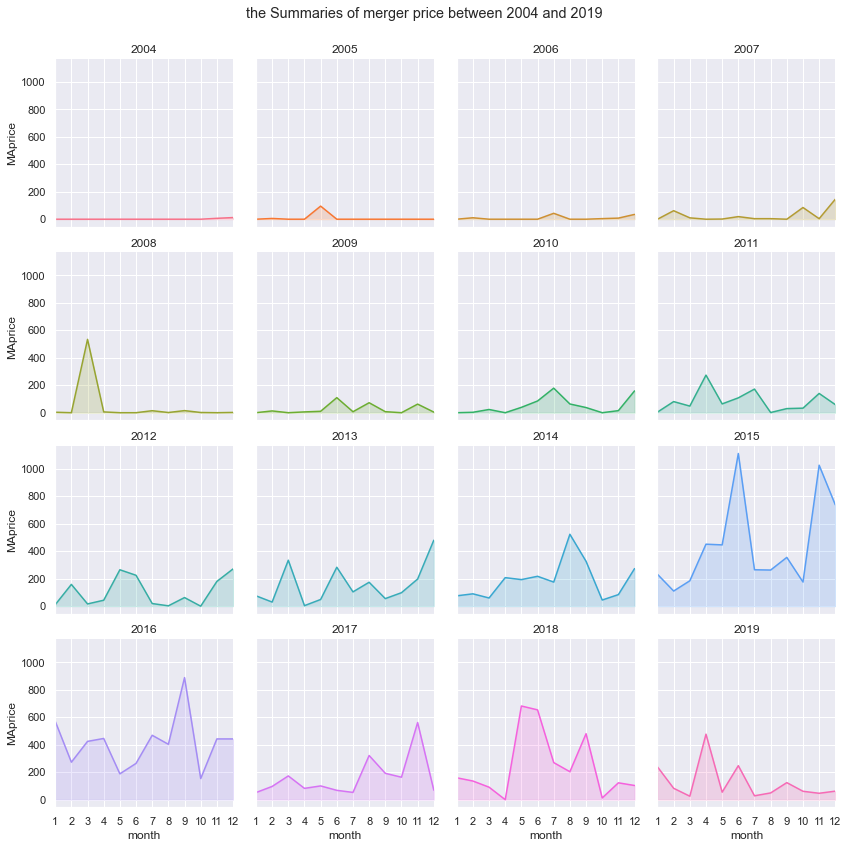

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")


sp_data = pd.read_csv(read_file_path("sixteen_year_price_data.csv"))


plt.figure(figsize=(10, 10), dpi=150)
# Create a grid : initialize it
g = sns.FacetGrid(data=sp_data, col='year', hue='year', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'month', 'MAprice')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'month', 'MAprice', alpha=0.2).set_titles("{col_name} year")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('the Summaries of merger price between 2004 and 2019 ')

plt.xticks(np.arange(1, 13))
plt.xlim(1, 12)

# Show the graph
plt.show()


Text(0.5, 1.0, 'the heap plot display merger price between  2004 and 2019 ')

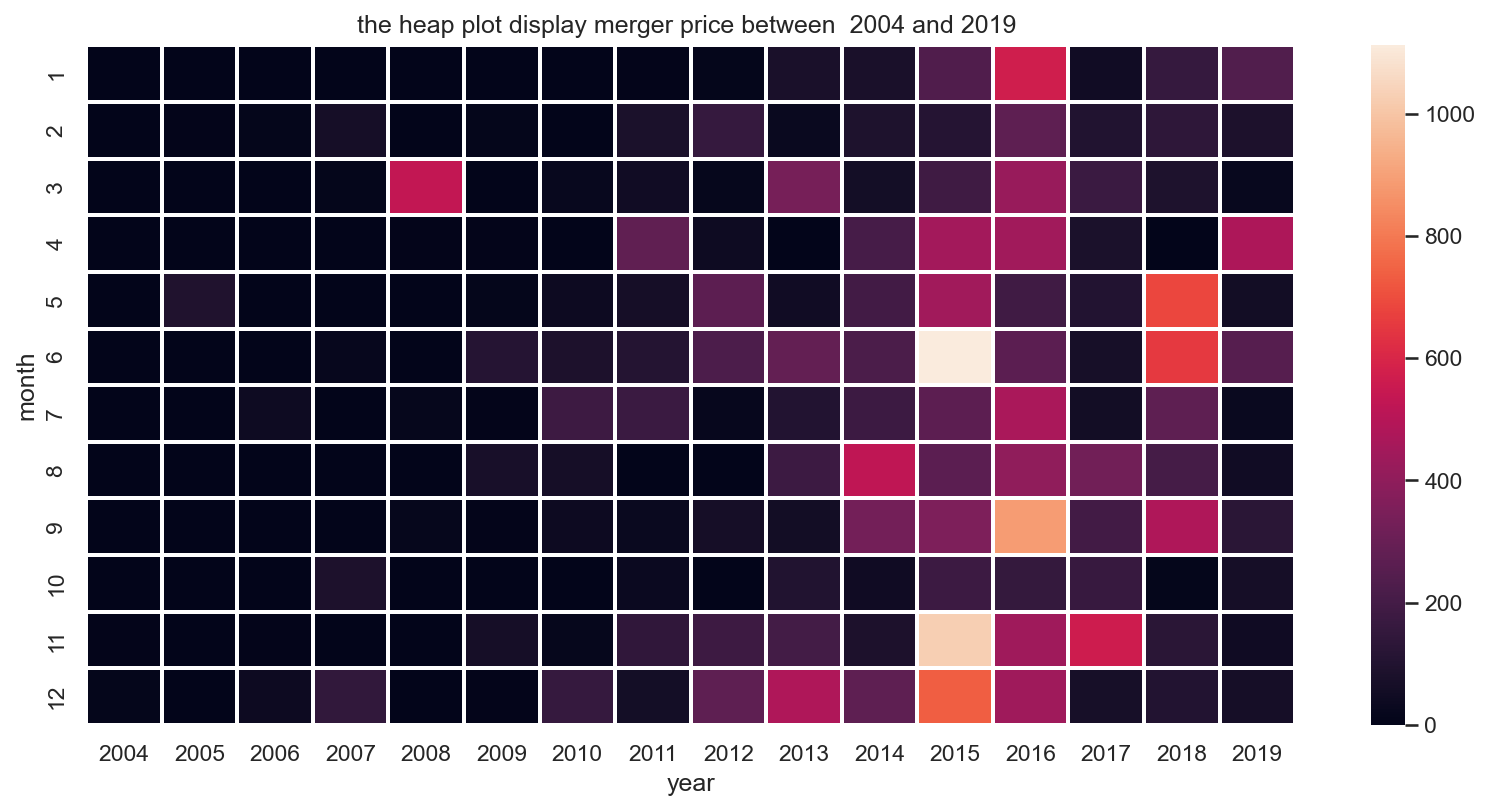

In [9]:
heap_data = sp_data.pivot('month', 'year', 'MAprice')

plt.figure(figsize=(13, 6), dpi=150)
sns.heatmap(heap_data, xticklabels=1, linewidths=1,linecolor='white')
plt.title("the heap plot display merger price between  2004 and 2019 ")

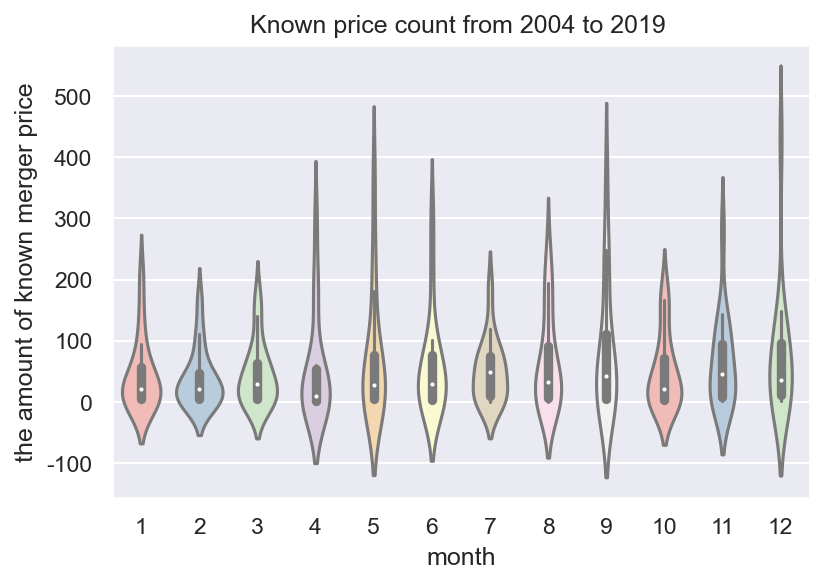

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

kpc_df = pd.read_csv(read_file_path("known_price_count.csv"))

plt.figure(dpi=150)

sns.set(style="darkgrid")
 

# print(kpc_df)
# Grouped violinplot
sns.violinplot(x="month", y="known_price_count", data=kpc_df, palette="Pastel1")
plt.title("Known price count from 2004 to 2019 ")
plt.ylabel("the amount of known merger price")
plt.show()

Text(0.5, 0.98, 'Known amount of merger price per year from 2013 to 2019')

<Figure size 900x600 with 0 Axes>

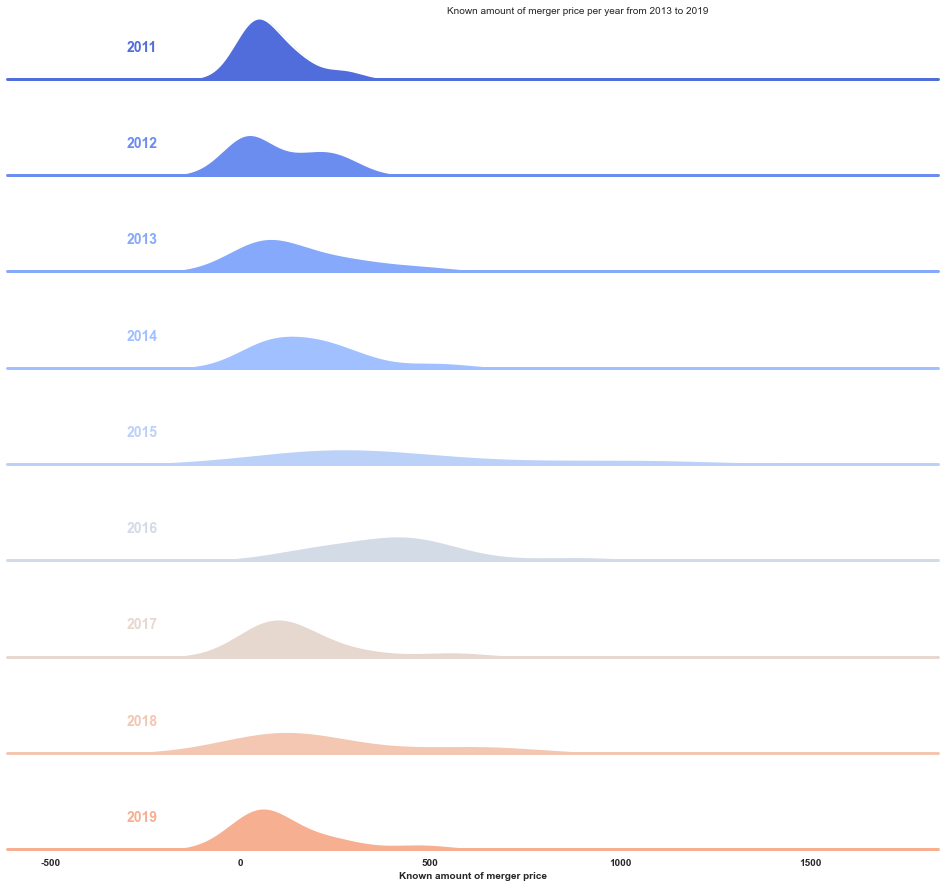

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

kpc_df = pd.read_csv(read_file_path("known_price_count.csv"))

year_list = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

temp = kpc_df[kpc_df["year"] > 2010]

pal = sns.color_palette(palette='coolwarm', n_colors=12)
sns.set_theme(style="white")
plt.figure(dpi=150)

g = sns.FacetGrid(data=temp, row="year", hue="year", aspect=10, height=1.4, palette=pal)
  
g.map(sns.kdeplot, 'price', bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, 'price', bw_adjust=1, clip_on=False, color="w", lw=2)

g.map(plt.axhline, y=0, lw=3, clip_on=False)

for i, ax in enumerate(g.axes.flat):
    ax.text(-300, 0.0024, year_list[i], fontweight='bold', fontsize=14, color=ax.lines[-1].get_color())

# g.fig.subplots_adjust(hspace=-0.3)
# plt.subplots_adjust(hspace=-0.5)
g.set_titles("")

g.set(yticks=[], ylabel="")

g.despine(left=True, bottom=True)

plt.setp(ax.get_xticklabels(), fontsize=10, fontweight='bold')

plt.xlabel('Known amount of merger price', fontweight='bold', fontsize=10)

g.fig.suptitle('Known amount of merger price per year from 2013 to 2019',
               ha='left',
               fontsize=10,
               fontweight=20)

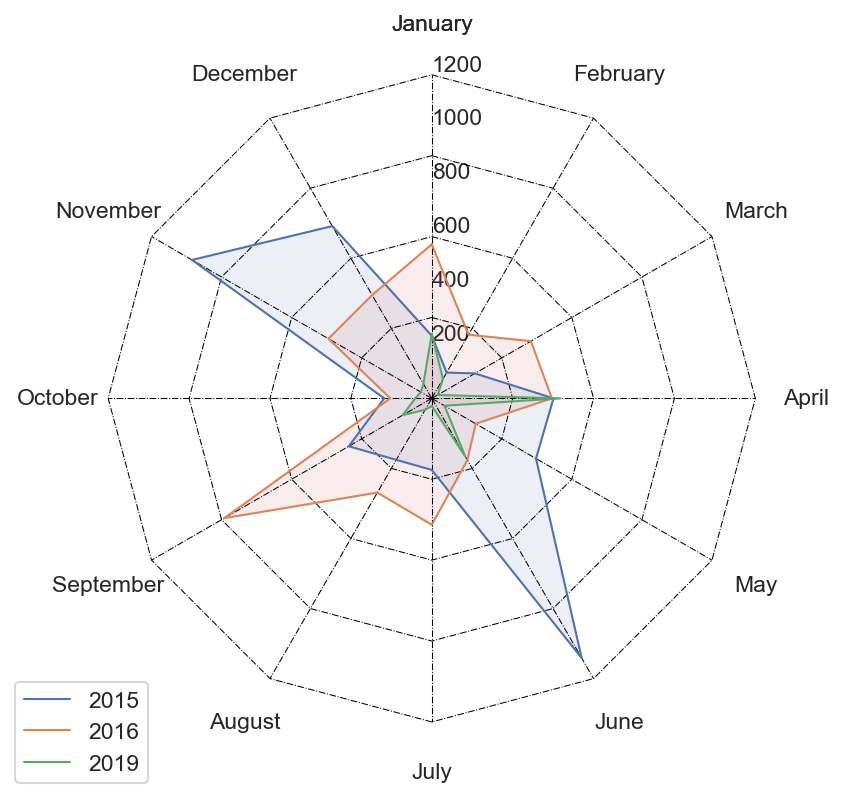

In [12]:
# 取 17 - 19 年
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sp_data = pd.read_csv(read_file_path("sixteen_year_price_data.csv"))
cond = sp_data['year'].isin([2015, 2016, 2019])
sub_data = sp_data.loc[cond].copy()
sub_data = sub_data.pivot('month', 'year', 'MAprice')

month = np.arange(1, 13).flatten().tolist()
month_dict = {1: 'January',
            2: 'February',
            3: 'March',
            4: 'April',
            5: 'May',
            6: 'June',
            7: 'July',
            8: 'August',
            9: 'September',
            10: 'October',
            11: 'November',
            12: 'December'}

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = np.linspace(0, 2 * np.pi, 12, endpoint=False).flatten().tolist()

sns.set_theme(style="white")
plt.figure(figsize=(8, 6), dpi=150,)
ax = plt.subplot(111, polar=True)
ax.spines['polar'].set_visible(False)
ax.grid(False)


month += month[:1]
_month = [ month_dict[index] for index in month]

angles += angles[:1]

# n 边形
floor , ceil = 0, 1200
n = 12

for i in np.arange(floor, ceil + 0.5 , 300):
    ax.plot(angles, [i] * (n+1), '-.', lw= 0.5, color='black')

for i in range(n):
    ax.plot([angles[i], angles[i]], [floor, ceil], '-.', lw=0.5, color='black')

# 2017
values= sub_data.iloc[:,0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='-', label="2015")
ax.fill(angles, values, 'b', alpha=0.1)
 
# 2018
values= sub_data.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='-', label="2016")
ax.fill(angles, values, 'r', alpha=0.1)
 
# 2019
values= sub_data.iloc[:,2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2019")
ax.fill(angles, values, 'r', alpha=0.1)

# Draw ylabels
ax.set_thetagrids(np.array(angles) * 180 / np.pi, _month)
ax.set_rlabel_position(0)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# # Show the graph
plt.show()


Text(0, 0.5, 'Merger price')

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


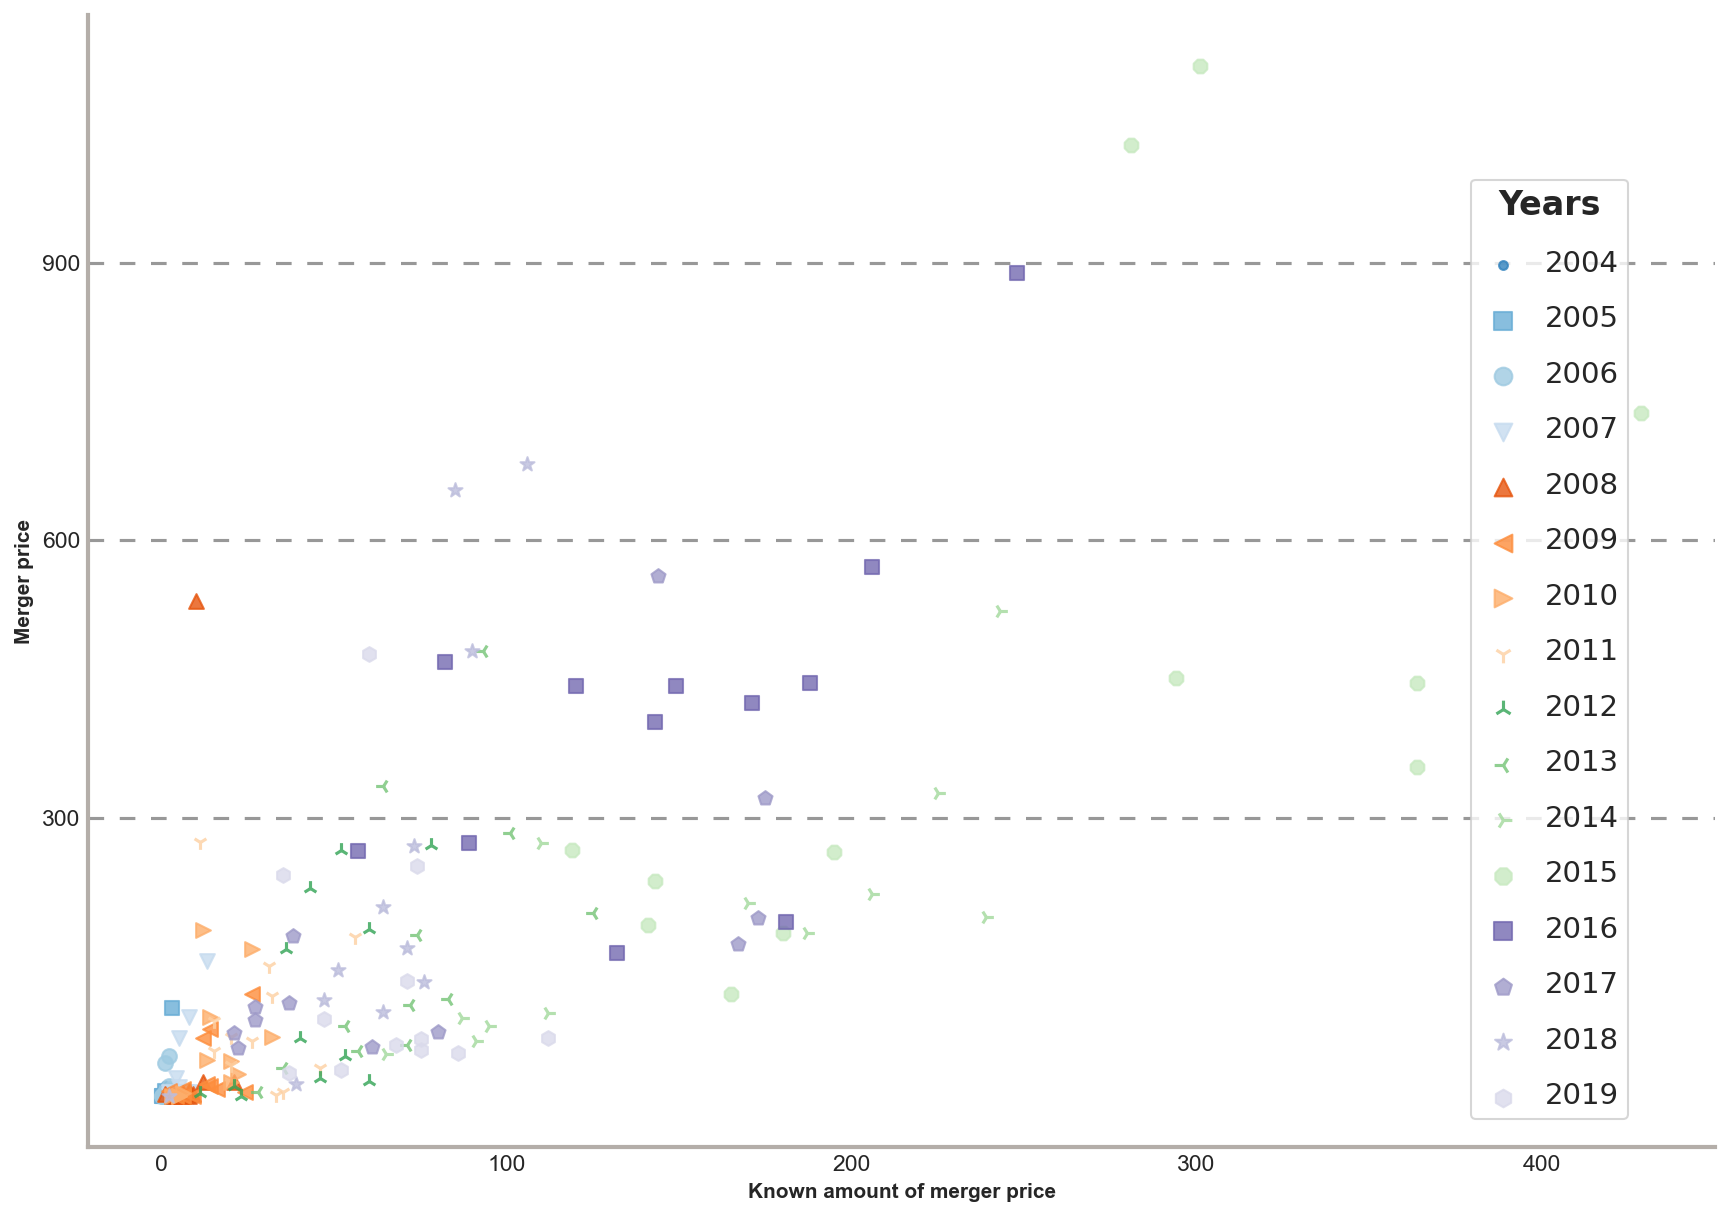

In [13]:
kpc_df = pd.read_csv(read_file_path("known_price_count.csv"))

BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
GREY30 = "#4d4d4d"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"

colors = sns.color_palette("tab20c")
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "+", "x"]

years = kpc_df["year"].unique()

# plt.rcParams['font.family'] = "FangSong"
fig, ax = plt.subplots(figsize= (14, 10), dpi=150)

# fig.patch.set_facecolor(BG_WHITE)
# ax.set_facecolor(BG_WHITE)

YTICKS = [300, 600, 900]

for y in YTICKS:
    ax.axhline(y, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

for index, year  in zip(np.arange(0, 16), years):
    data = kpc_df[kpc_df["year"] == year]
    ax.scatter(
        "known_price_count", "price", s=50,  color=colors[index], 
        marker=markers[index], alpha=0.8, data=data
    )

legend = ax.legend(
    loc=(0.85, 0.025), # bottom-right
    labelspacing=1.2,  # add space between labels
    markerscale=1.2,   # increase marker size
    frameon=True      # don't put a frame
)

for text, year in zip(legend.get_texts(), years):
    text.set_text(year)       # Set species name
    text.set_fontname("Roboto")  # Change default font 
    text.set_fontsize(14)        # Change default font size

legend.set_title("Years")
legend_title = legend.get_title()
legend_title.set_fontname("DejaVu Sans")
legend_title.set_fontweight("bold")
legend_title.set_fontsize(16)
legend_title.set_ha("left")

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
# ax.spines["left"].set_color("none")

ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

ax.tick_params(length=0)

ax.set_yticks(YTICKS)
plt.xlabel('Known amount of merger price', fontweight='bold', fontsize=10)
plt.ylabel('Merger price', fontweight='bold', fontsize=10)



In [14]:

def get_distinct_media_data(data):
    new_media_data = pd.DataFrame(data["Newsmedia"].value_counts()).stack().reset_index()
    new_media_data.drop('level_1', axis=1, inplace=True)
    new_media_data.rename(columns={"level_0":"Newsmedia", 0:"count"}, inplace=True)

    new_media_price_data = pd.DataFrame(data.groupby(['Newsmedia'])["MAprice"].sum()).stack().reset_index()

    new_media_price_data.drop('level_1',axis=1, inplace=True)
    new_media_price_data.rename(columns={0:'price'}, inplace=True)

    return pd.merge(new_media_data, new_media_price_data)

real_merger_data = pd.read_csv(read_file_path("real_merger_data.csv"))
media_data = get_distinct_media_data(real_merger_data)
print(media_data)

# all_media_data = get_distinct_media_data(data=data)

# print(all_media_data)


   Newsmedia  count        price
0      东方财富网    231  4740.585600
1        和讯网    152  2098.331000
2       凤凰财经    134  2127.576000
3        金融界    101  2244.480996
4         新浪     45  1377.413183
..       ...    ...          ...
78     每日财经网      1    30.000000
79       长城网      1    55.000000
80       东方网      1     2.210000
81       爱微帮      1    18.000000
82   Techweb      1    23.330000

[83 rows x 3 columns]


In [15]:
import random
p = media_data["price"]
p_sum = p.sum()

p = p / p_sum

c = media_data["count"]

c_sum = c.sum()
a = c_sum * p

media_data['d_count'] = a

# print(media_data)


media_filter = media_data[:17]
m_count = media_filter["count"]
m_f_sum = m_count.sum()
count_mean = m_f_sum / 17

count_shift = m_count - count_mean

ch1 = random.sample(range(0, 4), 4)
ch2 = np.array(random.sample(range(0, 13), 13)) + 4

ch = ch1 + ch2.tolist()

print(ch)
media_filter["count_shift"] = count_shift

print(media_filter.iloc[ch])

# _data = pre.append(rear)
# print(_data)
# print(c_filter_shift[choice])

# media_filter.to_csv("{}\{}".format(data_dir, "media_filter.csv"))

[1, 3, 2, 0, 4, 5, 11, 8, 6, 14, 7, 15, 9, 12, 16, 13, 10]
   Newsmedia  count        price     d_count  count_shift
1        和讯网    152  2098.331000   95.541439    95.235294
3        金融界    101  2244.480996  102.195957    44.235294
2       凤凰财经    134  2127.576000   96.873025    77.235294
0      东方财富网    231  4740.585600  215.848867   174.235294
4         新浪     45  1377.413183   62.716529   -11.764706
5         网易     44   572.972500   26.088647   -12.764706
11      中金在线     21   368.848000   16.794428   -35.764706
8       南方财富     32   699.860000   31.866103   -24.764706
6      中国证券网     41  1249.390000   56.887363   -15.764706
14       中证网     17   216.150000    9.841766   -39.764706
7         搜狐     36   529.580000   24.112895   -20.764706
15      证券之星     16   199.870000    9.100503   -40.764706
9        财经网     25   950.899000   43.296438   -31.764706
12      第一财经     20   532.804000   24.259691   -36.764706
16       全景网     11   268.970000   12.246772   -45.764706
13       新财界 

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_20016/1404163977.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_filter["count_shift"] = count_shift


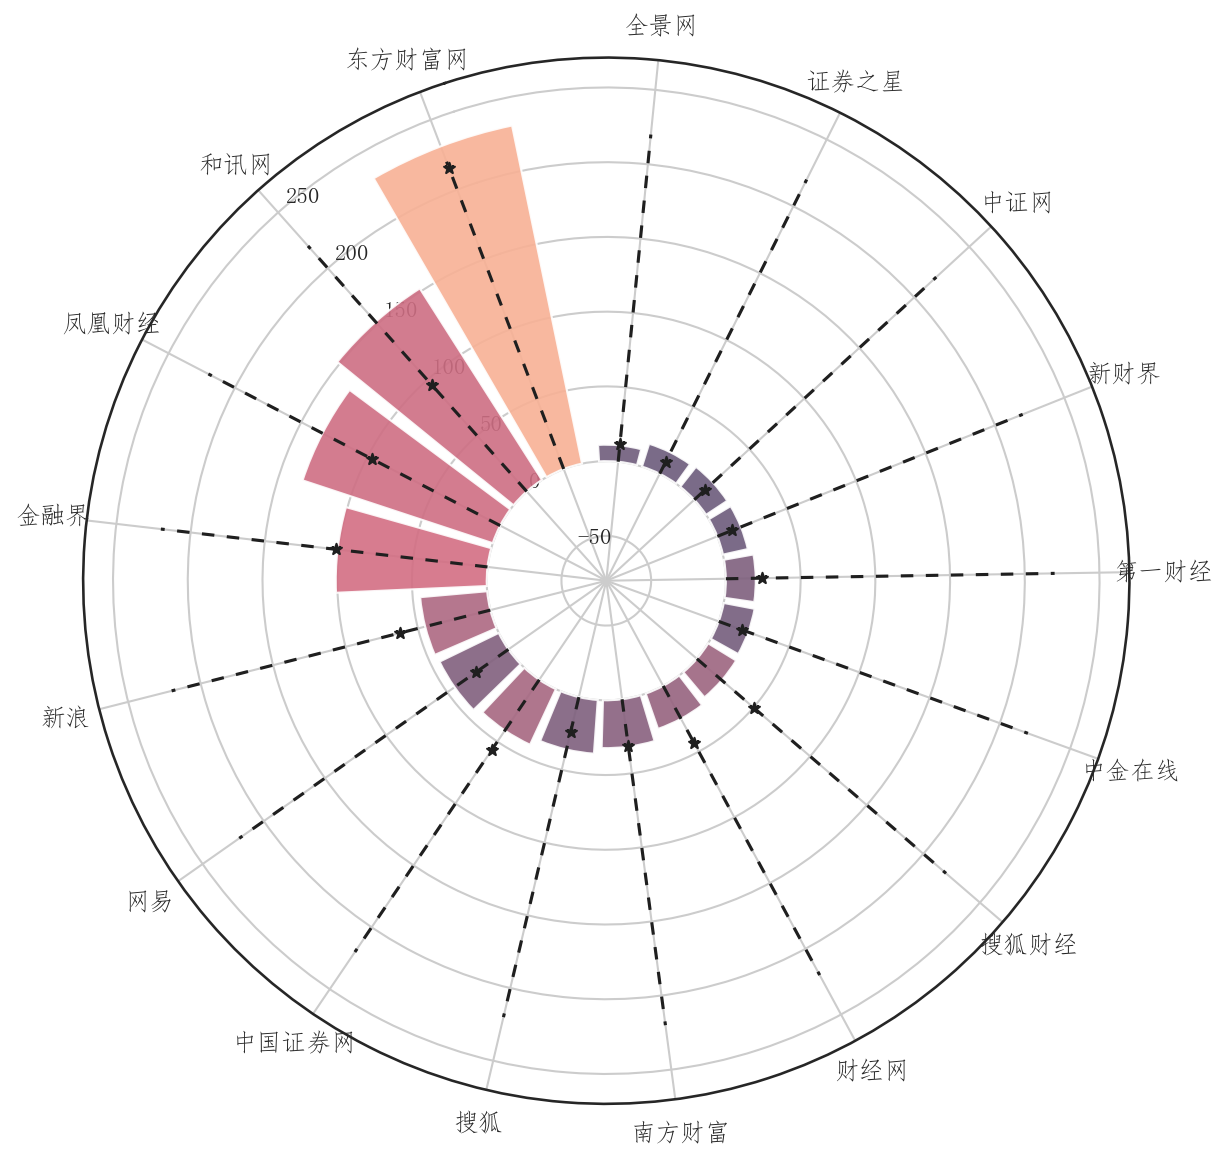

In [16]:
import matplotlib as mpl

media_data_softed = media_data.sort_values("count", ascending=False)

media_data_softed = media_data_softed[:17]


ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(media_data_softed), endpoint=False)

COUNT = media_data_softed["count"].values
PRICE = media_data_softed["d_count"].values


GREY12 = "#1f1f1f"
plt.rcParams.update({"font.family": "FangSong"})
plt.rcParams["text.color"] = GREY12

plt.rc("axes", unicode_minus=False)

COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

norm = mpl.colors.Normalize(vmin=PRICE.min(), vmax=PRICE.max())
COLORS = cmap(norm(PRICE))

plt.figure(figsize=(9, 11), dpi=150)
ax = plt.subplot(111, polar=True)
# fig, ax = plt.subplots(figsize=(10, 13), subplot_kw={"projection": "polar"})

# fig.patch.set_facecolor("white")
# ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-80, 270)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.32, zorder=9)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 220, color=GREY12, ls=(0, (4, 4)), zorder=12)

# Add dots to represent the mean gain
ax.scatter(ANGLES, PRICE, s=30, marker="*", color=GREY12, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
MEDIA = media_data_softed["Newsmedia"].values

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(MEDIA, size=12);

In [17]:
media_filter_data_path = "{}\{}".format(data_dir, 'media_filter.csv')
media_filter_data = pd.read_csv(media_filter_data_path)

def get_random_index_for_filter():
    
    ch1 = random.sample(range(0, 4), 4)
    ch2 = np.array(random.sample(range(0, 13), 13)) + 4

    ch = ch1 + ch2.tolist()

In [20]:
m = len(all_media_data)

m_count = all_media_data["count"]
m_f_sum = m_count.sum()
count_mean = m_f_sum / m

count_shift = m_count - count_mean

import random

ch = random.sample(range(m), m)

# print(count_shift[ch])

all_media_data["count_shift"] = count_shift

# print(all_media_data)

NameError: name 'all_media_data' is not defined

(0.0, 250.0)

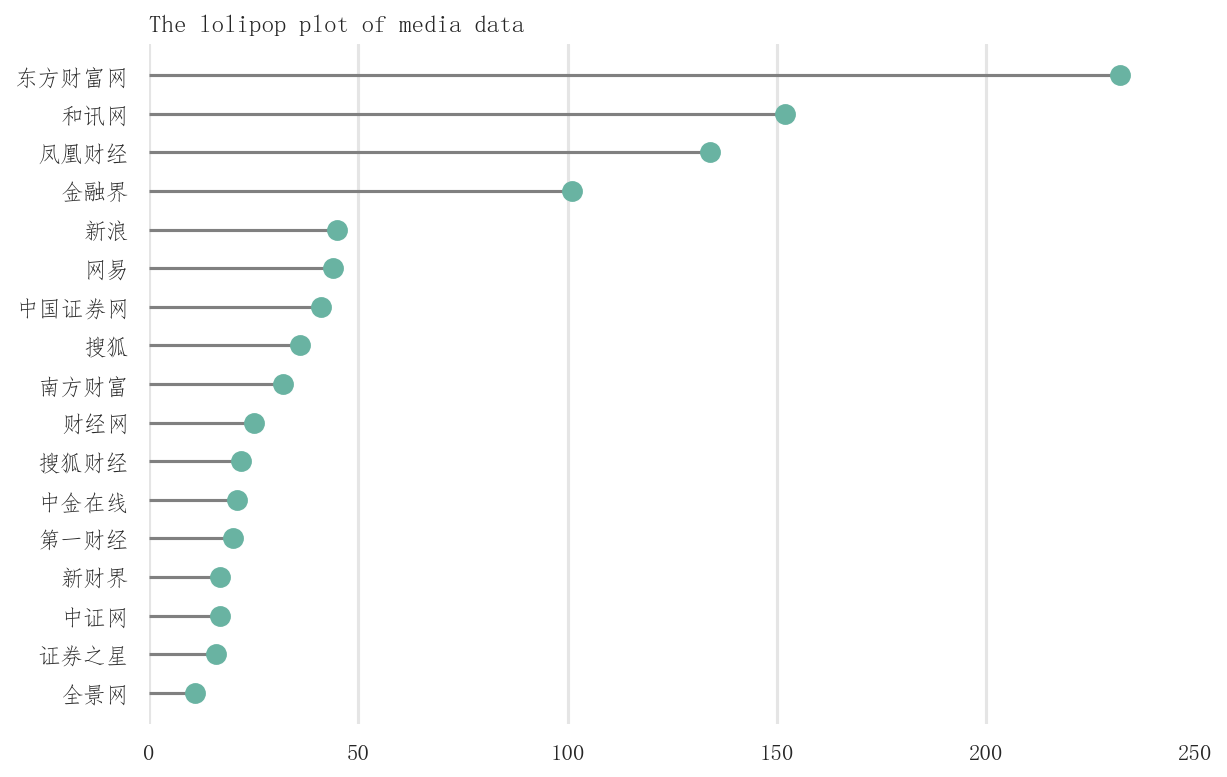

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


media_filter_data = pd.read_csv(read_file_path("media_filter.csv"))

sns.set_style("white")
 
plt.rcParams['font.family'] = "FangSong"
fig, ax = plt.subplots(figsize= (9, 6), dpi=150)

# Reorder it based on the values
ordered_df = media_filter_data.sort_values(by='count')
my_range=range(1,len(media_filter_data.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['count'], color='grey')
plt.plot(ordered_df['count'], my_range, "o", markersize=9,  color="#69b3a2")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.spines["bottom"].set_color("none")
ax.spines["left"].set_color("none")

# ax.spines["left"].set_color(GREY_LIGHT)
# ax.spines["left"].set_linewidth(2)
# ax.spines["bottom"].set_color(GREY_LIGHT)
# ax.spines["bottom"].set_linewidth(2)


XTICKS = [0, 50, 100, 150, 200]
for x in XTICKS:
       ax.axvline(x, color="black", linestyle='-', alpha=0.1, zorder=0)
# Add titles and axis names
plt.yticks(my_range, ordered_df['Newsmedia'])
plt.title("The lolipop plot of media data", loc='left')
plt.xlim(0, 250)

In [22]:
_map = {}
def collect_data(series):
    coname = series["Coname"]
    ifrumor = series["Ifrumor"]
    state = series["State"]
    
    row = _map.get(coname, np.zeros(3))
    
    if ifrumor == "无":
        row[0] += 1
    
    # if state == ""
    pass

# data.apply(collect_data, axis=1)

ddd = np.zeros(3).reshape(1, -1)

ddd = np.vstack((ddd, np.zeros(3)))
print(ddd)

[[0. 0. 0.]
 [0. 0. 0.]]


In [23]:
# 9
pro_df = pd.read_csv(read_file_path("processed_data.csv"))

temp = pd.DataFrame(columns={"Coname":[], "Newsmedia":[], "amount":[]})

temp["Coname"] = pro_df["Coname"]

def _map(name):
    if name.startswith("*ST"):
        name = name.strip("*ST")
    elif name.startswith("ST"):
        name = name.strip("ST")
    elif name.startswith("S*ST"):
        name = name.strip("*ST")
    return name
temp["Coname"] = temp["Coname"].map(_map)

temp["Newsmedia"] = pro_df["Newsmedia"]
temp = temp.fillna(1)
t = temp.groupby(["Coname", "Newsmedia"]).sum()
# print(t)
print()
t = t.sort_values(by="amount",ascending=False)
t.to_csv(read_file_path("ttt.csv"))

In [24]:


# coname_count = temp.groupby(["Coname"]).sum()
# media_count = temp.groupby(["Newsmedia"]).sum()

# word_list = []
# coname_list = coname_count.index.to_list()
# coname_count = coname_count.values.flatten()
# media_list = media_count.index.to_list()
# media_count = media_count.values.flatten()

# def get_text(_list, _count):
#     word_list.append(" ".join(_list))
#     # for name, count in zip(_list, _count):
#         # name = name.strip()

        
        
#         # text = " ".join([name] * count)
#         # word_list.append(text)

# get_text(coname_list, coname_count) 
# get_text(media_list, media_count) 


In [25]:
# text = " ".join(word_list)
# with open(read_file_path("word.txt"), "w", encoding='utf-8') as f:
#     f.write(text)
#     f.close()

In [26]:
# 9
from wordcloud import WordCloud
import PIL.Image as image
import matplotlib.pyplot as plt

def get_word_cloud(file_name, img_mask_name):
    with open(read_file_path(file_name), encoding='utf-8') as f:
        text = (f.read())
    img_mask = np.array(image.open(read_file_path(img_mask_name)))
    
    # load wordlist and set background image mask
    font_path = r"C:\Windows\Fonts\simhei.ttf"
    wordcloud = WordCloud(font_path=font_path,
                          background_color='white',
                          width=700,
                          height=700,
                          margin=0,
                          mask=img_mask
                          ).generate(text)

    plt.axis('off') # undisplay axies
    plt.imshow(wordcloud)


get_word_cloud("word.txt", "heart.jpg")

ModuleNotFoundError: No module named 'wordcloud'

In [28]:
from pyecharts import options as opts
from pyecharts.charts import Sankey
import pandas as pd

sn_df = pd.read_csv(read_file_path("name.csv"))
sn_df = sn_df[:50]

print(len(sn_df))
nn = pd.concat([sn_df['source'], sn_df['target']])
nn = nn.drop_duplicates()
nodes = pd.DataFrame(nn, columns=['name']).to_dict(orient='records')

links = sn_df.to_dict(orient='records')

# print(links)
sk =(
    Sankey(init_opts=opts.InitOpts(width="800px", height="600px")) # 页面大小
    .add(
        series_name="The media and corporation", # legend
        nodes=nodes,
        links=links,
        # opacity 透明度； curve 弯曲程度； color 色系
        linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5, color="source"), 
        label_opts=opts.LabelOpts(position="right"), # 节点名称
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="sankey")) # 标题
    # .render("sankey.html") # 保存成 html 文件
)

sk.render_notebook()

50


     year  month  MAprice
0    2004      1    0.000
1    2004      2    0.000
2    2004      3    0.000
3    2004      4    0.000
4    2004      5    0.000
..    ...    ...      ...
187  2019      8   49.130
188  2019      9  124.120
189  2019     10   61.230
190  2019     11   46.590
191  2019     12   62.158

[192 rows x 3 columns]


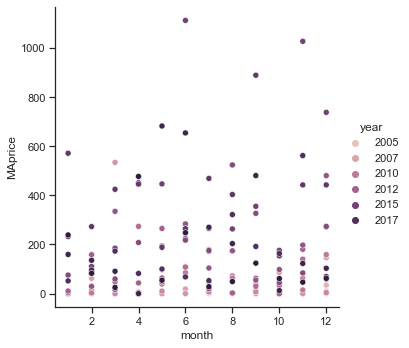

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")



print(sp_data)
sns.relplot(data=sp_data,x='month',y='MAprice',hue='year')

In [31]:
import pyecharts.options as opts
from pyecharts.charts import Line

print(media_data)
dff = media_data[:10]   # 数据
x = list(dff['Newsmedia'])
y1 = list(dff['count'])
y2 = list(dff['price'])
c = (
    Line()
    .add_xaxis(x)
    .add_yaxis("count", y1)
    .add_yaxis("price", y2)
    .set_global_opts(title_opts = opts.TitleOpts(title = '1'))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)
c.render_notebook() 

   Newsmedia  count        price     d_count
0      东方财富网    231  4740.585600  215.848867
1        和讯网    152  2098.331000   95.541439
2       凤凰财经    134  2127.576000   96.873025
3        金融界    101  2244.480996  102.195957
4         新浪     45  1377.413183   62.716529
..       ...    ...          ...         ...
78     每日财经网      1    30.000000    1.365963
79       长城网      1    55.000000    2.504266
80       东方网      1     2.210000    0.100626
81       爱微帮      1    18.000000    0.819578
82   Techweb      1    23.330000    1.062264

[83 rows x 4 columns]


In [32]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

dff = media_data   # 数据
dff = dff[:10]
x = list(dff['Newsmedia'])
y1 = list(dff['count'])
y2 = list(dff['price'])

c = (
    Pie()
    .add("", [list(z) for z in zip(x, y1)])
    .set_global_opts(title_opts=opts.TitleOpts(title="."))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    
)
c.render_notebook()


In [33]:
from pyecharts import options as opts
from pyecharts.charts import Bar

print(media_data)
dff = media_data[:10]   # 数据
x = list(dff['Newsmedia'])
y1 = list(dff['count'])
y2 = list(dff['price'])
c = (
    Bar()
    
    .add_xaxis(x)
    .add_yaxis("price", y2)
    .add_yaxis("count", y1)           
    .set_global_opts(title_opts = opts.TitleOpts(title = '1'))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    
)
c.render_notebook() 

   Newsmedia  count        price     d_count
0      东方财富网    231  4740.585600  215.848867
1        和讯网    152  2098.331000   95.541439
2       凤凰财经    134  2127.576000   96.873025
3        金融界    101  2244.480996  102.195957
4         新浪     45  1377.413183   62.716529
..       ...    ...          ...         ...
78     每日财经网      1    30.000000    1.365963
79       长城网      1    55.000000    2.504266
80       东方网      1     2.210000    0.100626
81       爱微帮      1    18.000000    0.819578
82   Techweb      1    23.330000    1.062264

[83 rows x 4 columns]


In [34]:
from pyecharts.charts import Boxplot

dff = media_filter[:16]

x = list(dff['Newsmedia'])
x = x[:2]

y1 =  dff['d_count'].values.reshape(2,-1).tolist()
y2 = dff['count_shift'].values.reshape(2, -1).tolist()


c = Boxplot()
c.add_xaxis(x)
c.add_yaxis("d_count",  c.prepare_data(y1))
c.add_yaxis("count_shift",  c.prepare_data(y2))
c.set_global_opts(
    title_opts=opts.TitleOpts(title="."),

)

c.render_notebook()

   Newsmedia  count        price     d_count  count_shift
0      东方财富网    231  4740.585600  215.848867   174.235294
1        和讯网    152  2098.331000   95.541439    95.235294
2       凤凰财经    134  2127.576000   96.873025    77.235294
3        金融界    101  2244.480996  102.195957    44.235294
4         新浪     45  1377.413183   62.716529   -11.764706
5         网易     44   572.972500   26.088647   -12.764706
6      中国证券网     41  1249.390000   56.887363   -15.764706
7         搜狐     36   529.580000   24.112895   -20.764706
8       南方财富     32   699.860000   31.866103   -24.764706
9        财经网     25   950.899000   43.296438   -31.764706
10      搜狐财经     22  1103.150000   50.228748   -34.764706
11      中金在线     21   368.848000   16.794428   -35.764706
12      第一财经     20   532.804000   24.259691   -36.764706
13       新财界     17   233.135000   10.615129   -39.764706
14       中证网     17   216.150000    9.841766   -39.764706
15      证券之星     16   199.870000    9.100503   -40.764706
16       全景网  

<AxesSubplot:xlabel='year', ylabel='MAprice'>

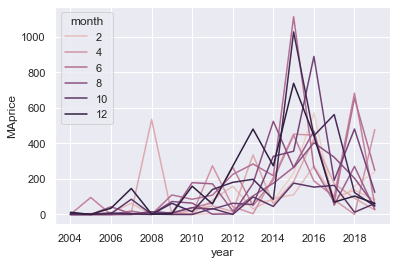

In [35]:
import seaborn as sns

print(media_filter)

sns.set_theme(style="darkgrid")



# Plot the responses for different events and regions
sns.lineplot(x="year", y="MAprice",
             hue="month", data=sp_data)

In [36]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker

dff = media_data   # 数据
dff = dff[5:15]
x = list(dff['Newsmedia'])
y1 = list(dff['count'])
y2 = list(dff['price'])

c = (
    Funnel()
    .add("Newsmedia", [list(z) for z in zip(x, y1)])
    .set_global_opts(title_opts=opts.TitleOpts(title="."))

)
c.render_notebook()

In [37]:
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.faker import Faker

dff = media_filter[4:]

x = list(dff['Newsmedia'])
y1 = list(dff['d_count'])
y2 = list(dff['count_shift'])
c = (
    EffectScatter()
    .add_xaxis(x)
    .add_yaxis("", y1)
    .set_global_opts(title_opts=opts.TitleOpts(title="."))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)
c.render_notebook()

In [38]:
from pyecharts import options as opts
from pyecharts.charts import PictorialBar
from pyecharts.globals import SymbolType
import pandas as pd

dff = media_filter[4:]

x = list(dff['Newsmedia'])
y1 = list(dff['d_count'])
y2 = list(dff['count_shift'])





c = (
    PictorialBar()
    .add_xaxis(x)
    .add_yaxis(
        "",
        y1,
        label_opts=opts.LabelOpts(is_show=False),
        symbol_size=18,
        symbol_repeat="fixed",
        symbol_offset=[0, 0],
        is_symbol_clip=True,
        
        symbol=SymbolType.ROUND_RECT,
        
    )
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title="."),
        xaxis_opts=opts.AxisOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(opacity=0)
            ),
        ),
    )

)
c.render_notebook()

D:\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
D:\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


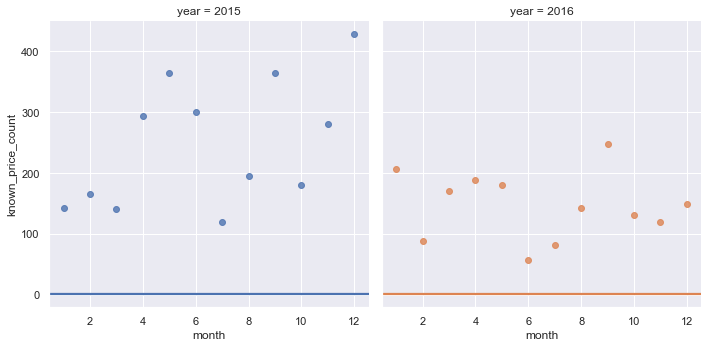

In [39]:
import seaborn as sns

kpc_df = pd.read_csv(read_file_path("known_price_count.csv"))
kpc_df = kpc_df.loc[kpc_df["year"].isin([2015, 2016])]



# print(sp_data)
pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x="month", y="known_price_count", col="year", hue="year", data=kpc_df,
               y_jitter=.02, logistic=True, truncate=False)
# g.set(xlim=(0, 80), ylim=(-.05, 1.05))